In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from functools import partial
from gensit.utils.misc_utils import *

from gensit.static.plot_variables import *
from gensit.static.global_variables import *


# LaTeX font configuration
mpl.rcParams.update(LATEX_RC_PARAMETERS)

In [2]:
%matplotlib inline

# AUTO RELOAD EXTERNAL MODULES
%load_ext autoreload
%autoreload 2

In [3]:
node_gt_pairs = [
    (50,1_000_000),
    (100,1_000_000),
    (150,1_000_000),
    (200,1_000_000),
    (250,10_000),
    (250,100_000),
    (250,250_000),
    (250,500_000),
    (250,1_000_000)
]

In [4]:
# for node,total in tqdm(node_gt_pairs):
#     dataset = f"synthetic_{node}x{node}_total_{total}"
#     ground_truth_table = np.loadtxt(f'../data/inputs/synthetic/{dataset}/ground_truth_table.txt')
#     I,J = np.shape(ground_truth_table)
#     training_cells = np.array([ [i,j] for i in range(I) for j in range(0,J//2)], dtype=np.int32)
#     test_cells = np.array([ [i,j] for i in range(I) for j in range(J//2,J)], dtype=np.int32)
#     os.mkdir(f"../data/inputs/synthetic/{dataset}/constraints/")
#     np.savetxt(f"../data/inputs/synthetic/{dataset}/constraints/training_cells_50%.txt",training_cells)
#     np.savetxt(f"../data/inputs/synthetic/{dataset}/constraints/test_cells_50%.txt",test_cells)

In [5]:
# nodes = 500
# total = 250_000


# dataset = f"synthetic_{nodes}x{nodes}_total_{total}"
# ground_truth_table = np.loadtxt(f'../data/inputs/synthetic/{dataset}/ground_truth_table.txt')
# cost_matrix = np.loadtxt(f'../data/inputs/synthetic/{dataset}/cost_matrix.txt')
# I,J = np.shape(ground_truth_table)

# Computation time figure

In [6]:
total_compute = read_json("../../data/outputs/synthetic/paper_figures/figure0/gensit_total_compute_times_n1000_label_type_markersize_1.0_linewidth_1.0_opacity_1.0_hatchopacity_1.0_data.json")
table_compute = read_json("../../data/outputs/synthetic/paper_figures/figure0/gensit_table_compute_times_n1000_label_type_markersize_1.0_linewidth_1.0_opacity_1.0_hatchopacity_1.0_data.json")
intensity_compute = read_json("../../data/outputs/synthetic/paper_figures/figure0/gensit_intensity_compute_times_n1000_label_type_markersize_1.0_linewidth_1.0_opacity_1.0_hatchopacity_1.0_data.json")

total_compute = {
    "x": np.array(list(flatten(total_compute['x']))),
    "origins": np.array([int(x.split('x')[0]) for x in list(flatten(np.array(total_compute['x'])))]),
    "destinations": np.array([int(x.split('x')[1]) for x in list(flatten(np.array(total_compute['x'])))]),
    "origins_x_destinations": np.array([int(x.split('x')[0])*int(x.split('x')[1]) for x in list(flatten(np.array(total_compute['x'])))]),
    "y": np.array(list(flatten(total_compute['y']))),
    "label": np.array(total_compute['label']),
    "order": np.argsort([int(x.split('x')[0]) for x in list(flatten(np.array(total_compute['x'])))])
}
table_compute = {
    "x": np.array(list(flatten(table_compute['x']))),
    "y": np.array(list(flatten(table_compute['y']))),
    "origins": np.array([int(x.split('x')[0]) for x in list(flatten(np.array(table_compute['x'])))]),
    "destinations": np.array([int(x.split('x')[1]) for x in list(flatten(np.array(table_compute['x'])))]),
    "origins_x_destinations": np.array([int(x.split('x')[0])*int(x.split('x')[1]) for x in list(flatten(np.array(table_compute['x'])))]),
    "label": np.array(table_compute['label']),
    "order": np.argsort([int(x.split('x')[0]) for x in list(flatten(np.array(table_compute['x'])))])
}
intensity_compute = {
    "x": np.array(list(flatten(intensity_compute['x']))),
    "y": np.array(list(flatten(intensity_compute['y']))),
    "origins": np.array([int(x.split('x')[0]) for x in list(flatten(np.array(intensity_compute['x'])))]),
    "destinations": np.array([int(x.split('x')[1]) for x in list(flatten(np.array(intensity_compute['x'])))]),
    "origins_x_destinations": np.array([int(x.split('x')[0])*int(x.split('x')[1]) for x in list(flatten(np.array(intensity_compute['x'])))]),
    "label": np.array(intensity_compute['label']),
    "order": np.argsort([int(x.split('x')[0]) for x in list(flatten(np.array(intensity_compute['x'])))])
}

# Re-order 
total_compute['x'] = np.array(total_compute['x'][total_compute['order']])
total_compute['y'] = np.array(total_compute['y'][total_compute['order']])
total_compute['origins'] = np.array(total_compute['origins'][total_compute['order']])
total_compute['destinations'] = np.array(total_compute['destinations'][total_compute['order']])
total_compute['origins_x_destinations'] = np.array(total_compute['origins_x_destinations'][total_compute['order']])
total_compute['label'] = np.array(total_compute['label'][total_compute['order']])

table_compute['x'] = np.array(table_compute['x'][table_compute['order']])
table_compute['y'] = np.array(table_compute['y'][table_compute['order']])
table_compute['origins'] = np.array(table_compute['origins'][table_compute['order']])
table_compute['destinations'] = np.array(table_compute['destinations'][table_compute['order']])
table_compute['origins_x_destinations'] = np.array(table_compute['origins_x_destinations'][table_compute['order']])
table_compute['label'] = np.array(table_compute['label'][table_compute['order']])

intensity_compute['x'] = np.array(intensity_compute['x'][intensity_compute['order']])
intensity_compute['y'] = np.array(intensity_compute['y'][intensity_compute['order']])
intensity_compute['origins'] = np.array(intensity_compute['origins'][intensity_compute['order']])
intensity_compute['destinations'] = np.array(intensity_compute['destinations'][intensity_compute['order']])
intensity_compute['origins_x_destinations'] = np.array(intensity_compute['origins_x_destinations'][intensity_compute['order']])
intensity_compute['label'] = np.array(intensity_compute['label'][intensity_compute['order']])

# Transform
# transformation = partial(np.emath.logn,4)
transformation = lambda x: x
total_compute['y'] = np.array(transformation(total_compute['y']))
total_compute['origins_x_destinations'] = np.array(transformation(total_compute['origins_x_destinations']))
table_compute['y'] = np.array(transformation(table_compute['y']))
table_compute['origins_x_destinations'] = np.array(transformation(table_compute['origins_x_destinations']))
intensity_compute['y'] = np.array(transformation(intensity_compute['y']))
intensity_compute['origins_x_destinations'] = np.array(transformation(intensity_compute['origins_x_destinations']))


# Color
colours = {
    '\\frameworktag (Disjoint)': "blue",
    '\\frameworktag (Joint)': "green",
    '\\gaskinframeworktag': "red"
}
total_compute['colour'] = [colours[l] for l in total_compute['label']]
table_compute['colour'] = [colours[l] for l in table_compute['label']]
intensity_compute['colour'] = [colours[l] for l in intensity_compute['label']]

In [7]:
total_compute['x']

array(['100x100', '100x100', '100x100', '200x200', '200x200', '200x200',
       '300x300', '300x300', '300x300', '400x400', '400x400', '400x400',
       '500x500', '500x500', '500x500', '600x600', '600x600', '600x600',
       '700x700', '700x700', '700x700', '800x800', '800x800', '800x800',
       '900x900', '900x900', '900x900', '1000x1000', '1000x1000',
       '1000x1000'], dtype='<U9')

In [8]:
LABEL_SIZE = 25
LEGEND_SIZE = 18
TICK_PAD = 0
TICK_SIZE = 25
TICK_ROTATION = 0
Y_LABELS = ['Total Compute Time (s)','Table Sampling Time (s)','Intensity Learning Time (s)']
filepath = "../../data/outputs/synthetic/paper_figures/figure0/gensit_computation_time_scalability_with_dimension"

X_VAR = 'origins_x_destinations'
Y_VAR = 'y'

# Index of method (label)
index = 0

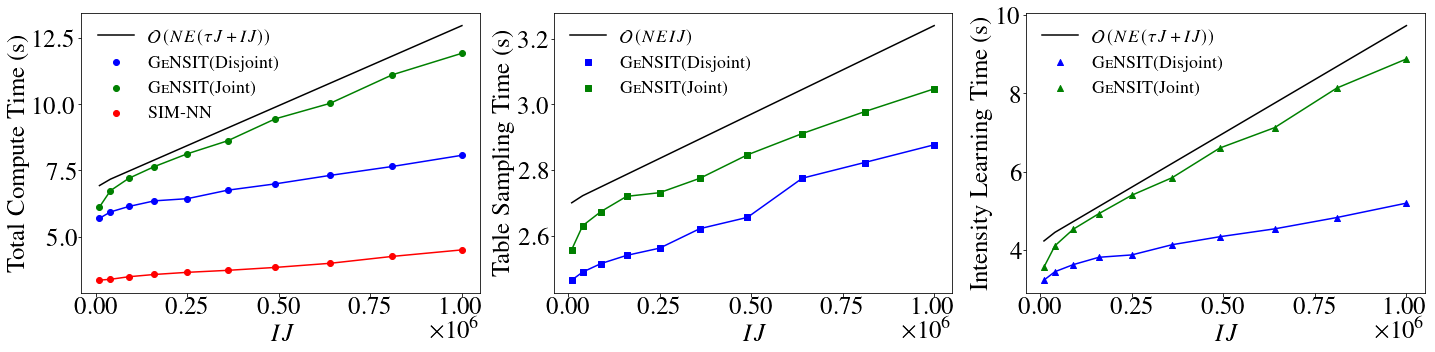

In [11]:
fig, axs = plt.subplots(1,3,figsize=(20,5))

### Table compute time
for i in range(len(table_compute['x'])):
    axs[1].scatter(
        x = table_compute['origins_x_destinations'][i],
        y = table_compute['y'][i],
        label = table_compute['label'][i],
        c = table_compute['colour'][i],
        marker = 's'
    )
for label in np.unique(table_compute['label']):
    indices = np.argwhere(table_compute['label'] == label).T[0]
    axs[1].plot(
        table_compute['origins_x_destinations'][indices],
        table_compute['y'][indices],
        color = table_compute['colour'][indices[0]]
    )
first_time = 2.7
table_coeff = 0.002
table_complexities = [ table_compute['origins'][m]*table_compute['destinations'][m] for m in list(range(index,len(table_compute['x']),2))]
table_factors = [1.0 if fi == 0 else table_complexities[fi]/table_complexities[fi-1] for fi in range(len(table_complexities))]
table_theoretical_time = transformation([first_time*(1 + int(fi>0)*table_coeff*np.prod(table_factors[:(fi+1)])) for fi in range(len(table_factors))])
# table_theoretical_time = transformation([3]*len(table_factors))
axs[1].plot(
    table_compute['origins_x_destinations'][indices],
    table_theoretical_time,
    color = 'black',
    label = r'$\bigoh{NEIJ}$'
)

### Intensity compute time
for i in range(len(intensity_compute['x'])):
    axs[2].scatter(
        x = intensity_compute['origins_x_destinations'][i],
        y = intensity_compute['y'][i],
        label = intensity_compute['label'][i],
        c = intensity_compute['colour'][i],
        marker = '^'
    )
for label in np.unique(intensity_compute['label']):
    indices = np.argwhere(intensity_compute['label'] == label).T[0]
    axs[2].plot(
        intensity_compute['origins_x_destinations'][indices],
        intensity_compute['y'][indices],
        color = intensity_compute['colour'][indices[0]]
    )
first_time = intensity_compute['y'][index+1] + 1
intensity_coeff = 0.013
intensity_complexities = [ intensity_compute['destinations'][m]*(intensity_compute['origins'][m]) for m in list(range(index,len(intensity_compute['x']),2))]
intensity_factors = [1.0 if fi == 0 else intensity_complexities[fi]/intensity_complexities[fi-1] for fi in range(len(intensity_complexities))]
intensity_theoretical_time = transformation([first_time*(1 + int(fi>0)*intensity_coeff*np.prod(intensity_factors[:(fi+1)])) for fi in range(len(intensity_factors))])
axs[2].plot(
    intensity_compute['origins_x_destinations'][indices],
    intensity_theoretical_time,
    color = 'black',
    label = r'$\bigoh{NE(\tau J+IJ)}$'
)

### Total compute time
for i in range(len(total_compute['x'])):
    axs[0].scatter(
        x = total_compute['origins_x_destinations'][i],
        y = total_compute['y'][i],
        label = total_compute['label'][i],
        c = total_compute['colour'][i],
        marker = 'o'
    )
for label in np.unique(total_compute['label']):
    indices = np.argwhere(total_compute['label'] == label).T[0]
    axs[0].plot(
        total_compute['origins_x_destinations'][indices],
        total_compute['y'][indices],
        color = total_compute['colour'][indices[0]]
    )
axs[0].plot(
    total_compute['origins_x_destinations'][indices],
    np.array(intensity_theoretical_time)+np.array(table_theoretical_time),
    color = 'black',
    label = r'$\bigoh{NE(\tau J+IJ)}$'
)

for j,ax in enumerate(axs):
    # Create dictionary of labels
    by_label = {}
    handles, label, label_split = [],[],[]
    # Ensure no duplicate entries in legend exist
    ax_handles, ax_labels = ax.get_legend_handles_labels()
    # Convert everything to numpy arrays
    ax_label_split = [lab.split(', ') for lab in ax_labels]

    # Add legend handles and labels to list
    handles += ax_handles
    label_split += ax_label_split
    label += ax_labels

    label_split = np.array(label_split,dtype='str')
    # Sort label first by first label, then by second etc.
    index_sorted = np.lexsort(label_split.T)
    # Do not worry about duplicates. These will be handled here
    # Create dictionary of label
    by_label = dict(zip(
        np.array(label)[index_sorted].tolist(), 
        np.array(handles)[index_sorted].tolist()
    ))

    # If more than one column are provided split legend patches and keys
    # into sublists of length ncols
    leg = ax.legend(
        flip(list(by_label.values()), 1), 
        flip(list(by_label.keys()), 1),
        frameon = False,
        prop = {'size':LEGEND_SIZE},
    )
    leg._ncol = 1

    ax.set_ylabel(Y_LABELS[j],fontsize=LABEL_SIZE)
    ax.set_xlabel('$IJ$',fontsize=LABEL_SIZE)
    ax.tick_params(
        pad = TICK_PAD,
        bottom = True,
        labelsize = TICK_SIZE,
        rotation = TICK_ROTATION
    )
    ax.xaxis.offsetText.set_fontsize(TICK_SIZE)

# fig.tight_layout(rect=(0, 0, 0.7, 1.1))
fig.tight_layout(rect=(0, 0, 1, 1))
plt.show()
# Write figure
write_figure(
    fig,
    filepath,
    figure_format = 'pdf'
)

# SRMSE with dimension plot

In [12]:
dim_scalability = read_json("../../data/outputs/synthetic/paper_figures/figure1/table_mcmc_dimension_scalability_direct_sampling_label_type_markersize_1.0_linewidth_1.0_opacity_1.0_hatchopacity_1.0_data.json")

dim_scalability = {
    "x": np.array(list(flatten(dim_scalability['x']))),
    "origins": np.array([int(x.split('x')[0]) for x in list(flatten(np.array(dim_scalability['x'])))]),
    "destinations": np.array([int(x.split('x')[1]) for x in list(flatten(np.array(dim_scalability['x'])))]),
    "y": np.array(list(flatten(dim_scalability['y']))),
    "label": np.array(dim_scalability['label']),
    "order": np.argsort([int(x.split('x')[0]) for x in list(flatten(np.array(dim_scalability['x'])))])
}

# Re-order 
dim_scalability['x'] = list(dim_scalability['x'][dim_scalability['order']])
dim_scalability['y'] = list(dim_scalability['y'][dim_scalability['order']])
dim_scalability['origins'] = list(dim_scalability['origins'][dim_scalability['order']])
dim_scalability['destinations'] = list(dim_scalability['destinations'][dim_scalability['order']])
dim_scalability['label'] = list(dim_scalability['label'][dim_scalability['order']])

In [13]:
LABEL_SIZE = 25
LEGEND_SIZE = 20
TICK_PAD = 0
TICK_SIZE = 20
TICK_ROTATION = 0
Y_LABEL = r'SRMSE'#$(\mathbb{E}[\mytable^{(1:N)}\vert\myintensity],\groundtruthtable)$
dim_scalability_filepath = "../../data/outputs/synthetic/paper_figures/figure1/table_mcmc_srmse_scalability_with_dimension_direct_sampling"

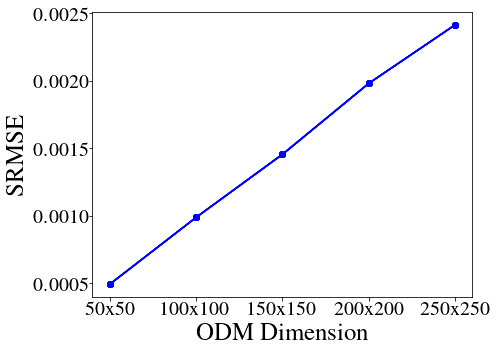

In [22]:
fig, ax = plt.subplots(1,1,figsize=(7,5))

### SRMSE vs dimensions
for i in range(len(dim_scalability['x'])):
    ax.plot(
        dim_scalability['x'],
        dim_scalability['y'],
        label = dim_scalability['label'],
        marker = 'o',
        color = 'blue'
    )

ax.set_ylabel(Y_LABEL,fontsize=LABEL_SIZE)
ax.set_xlabel('ODM Dimension',fontsize=LABEL_SIZE)
ax.tick_params(
    pad = TICK_PAD,
    bottom = True,
    labelsize = TICK_SIZE,
    rotation = TICK_ROTATION
)

# fig.tight_layout(rect=(0, 0, 0.7, 1.1))
fig.tight_layout(rect=(0, 0, 1, 1))
plt.show()
# Write figure
write_figure(
    fig,
    dim_scalability_filepath,
    figure_format = 'ps'
)

# SRMSE with total number of agents

In [23]:
agent_scalability = read_json("../../data/outputs/synthetic/paper_figures/figure2/table_mcmc_agent_scalability_direct_sampling_label_proposal_markersize_1.0_linewidth_1.0_opacity_1.0_hatchopacity_1.0_data.json")

agent_scalability = {
    "x": np.array(list(flatten(agent_scalability['x']))),
    "y": np.array(list(flatten(agent_scalability['y']))),
    "label": np.array(list(flatten(agent_scalability['label']))),
    "order": np.argsort([x for x in list(flatten(np.array(agent_scalability['x'])))])
}

# Re-order 
agent_scalability['x'] = list(agent_scalability['x'][agent_scalability['order']])
agent_scalability['y'] = list(agent_scalability['y'][agent_scalability['order']])

In [24]:
LABEL_SIZE = 25
LEGEND_SIZE = 20
TICK_PAD = 0
TICK_SIZE = 20
TICK_ROTATION = 0
Y_LABEL = r'SRMSE'#$(\mathbb{E}[\mytable^{(1:N)}\vert\myintensity],\groundtruthtable)$
agent_scalability_filepath = "../../data/outputs/synthetic/paper_figures/figure2/table_mcmc_srmse_scalability_with_agent_number_direct_sampling"

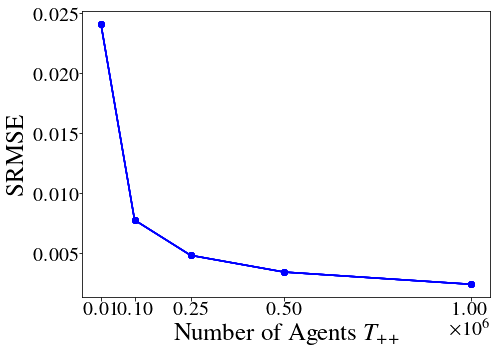

In [25]:
fig, ax = plt.subplots(1,1,figsize=(7,5))

### SRMSE vs dimensions
for i in range(len(agent_scalability['x'])):
    ax.plot(
        agent_scalability['x'],
        agent_scalability['y'],
        label = agent_scalability['label'],
        marker = 'o',
        color = 'blue'
    )

ax.set_ylabel(Y_LABEL,fontsize=LABEL_SIZE)
ax.set_xlabel(r'Number of Agents $\deepred{\mytabletotal}$',fontsize=LABEL_SIZE)
ax.tick_params(
    pad = TICK_PAD,
    bottom = True,
    labelsize = TICK_SIZE,
    rotation = TICK_ROTATION
)
ax.set_xticks(agent_scalability['x'])
ax.xaxis.offsetText.set_fontsize(TICK_SIZE)

# fig.tight_layout(rect=(0, 0, 0.7, 1.1))
fig.tight_layout(rect=(0, 0, 1, 1))
plt.show()
# Write figure
write_figure(
    fig,
    agent_scalability_filepath,
    figure_format = 'ps'
)